
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy

import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
def build_model():
    model = Sequential()

    model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    return model

def exp(opt, batch_size, epochs, X_train, y_train, X_test, y_test, show_plot=False):
    model = build_model()
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                    shuffle=True, verbose=2, validation_split=0.3)
    
    scores = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    print ("The test loss is", scores)
    result = model.predict(X_test, batch_size=batch_size, verbose=0)

    result_max = numpy.argmax(result, axis=1)
    test_max = numpy.argmax(y_test, axis=1)

    result_bool = numpy.equal(result_max, test_max)
    true_num = numpy.sum(result_bool)
    print ("The accuracy of the model is %f" % (true_num/len(result_bool)))
    
    if not show_plot:
        return
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

## batch_size: 32
## epochs: 5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
 - 14s - loss: 2.8752 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/5
 - 13s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/5
 - 13s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/5
 - 13s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/5
 - 13s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
The test loss is [2.876465654373169, 0.8205599522590638]
The accuracy of the model is 0.102800


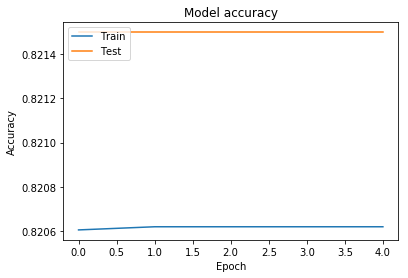

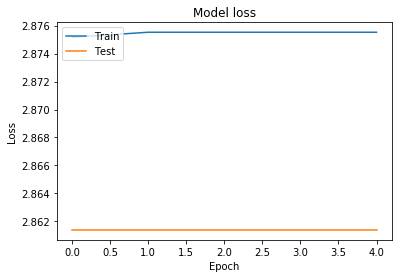


## batch_size: 32
## epochs: 10
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 14s - loss: 2.8886 - acc: 0.8198 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 2/10
 - 13s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 3/10
 - 13s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 4/10
 - 14s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 5/10
 - 13s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 6/10
 - 14s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 7/10
 - 14s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 8/10
 - 14s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 9/10
 - 13s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
Epoch 10/10
 - 13s - loss: 2.8898 - acc: 0.8197 - val_loss: 2.8890 - val_acc: 0.8198
The test loss is [2.891854705810547, 0.8195999419689178]
The accuracy of the

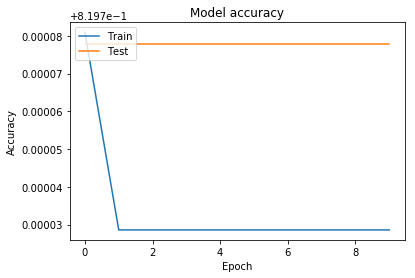

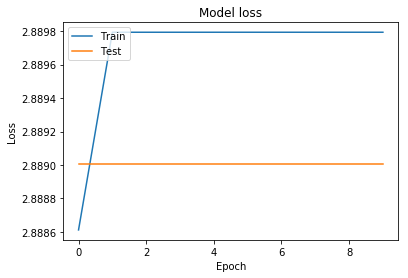


## batch_size: 64
## epochs: 5
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
 - 8s - loss: 2.8969 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/5
 - 7s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 3/5
 - 7s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 4/5
 - 7s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 5/5
 - 7s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
The test loss is [2.8937783098220824, 0.8194799458980561]
The accuracy of the model is 0.097400


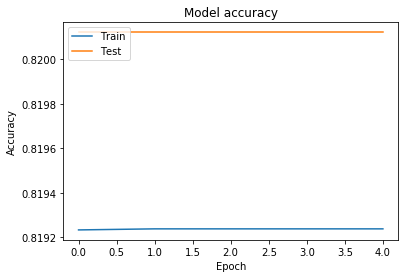

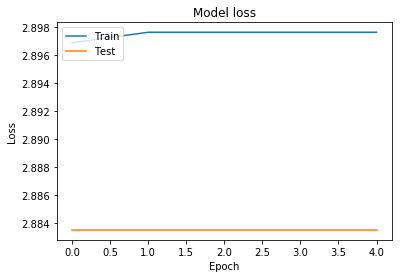


## batch_size: 64
## epochs: 10
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 8s - loss: 2.8722 - acc: 0.8207 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/10
 - 8s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 6/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 7/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 8/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 9/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 10/10
 - 7s - loss: 2.8754 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
The test loss is [2.876465654373169, 0.8205599522590638]
The accuracy of the model is 

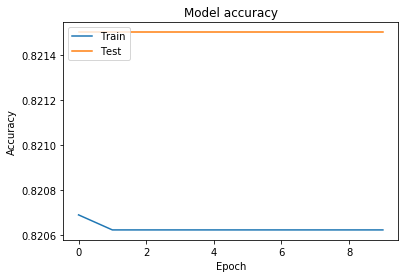

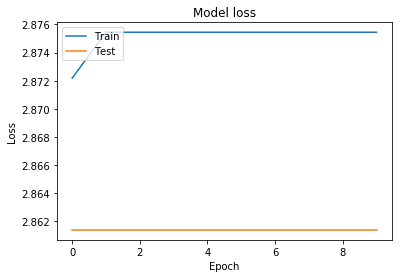

In [4]:
for batch_size in [32, 64]:
    for epochs in [5, 10]:
        print('## batch_size:', batch_size)
        print('## epochs:', epochs)
        exp('adam', batch_size, epochs, X_train, y_train, X_test, y_test, True)
        print()

In [5]:
for opt in ['SGD', 'Adam', 'Rmsprop']:
    print('## Opt:', opt)
    exp(opt, 64, 5, X_train, y_train, X_test, y_test, False)
    print()

## Opt: SGD
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
 - 7s - loss: 2.8733 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/5
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/5
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/5
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/5
 - 6s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
The test loss is [2.876454668045044, 0.8205599522590638]
The accuracy of the model is 0.102800

## Opt: Adam
Train on 42000 samples, validate on 18000 samples
Epoch 1/5
 - 8s - loss: 2.8681 - acc: 0.8209 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 2/5
 - 8s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 3/5
 - 8s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 4/5
 - 8s - loss: 2.8755 - acc: 0.8206 - val_loss: 2.8614 - val_acc: 0.8215
Epoch 5/5
 - 8s - loss: 2.8755 - acc: 0.8

In [6]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'